In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import warnings



def spearman(data1,x,y_value):
    warnings.filterwarnings("ignore")
    plt.rcParams['font.sans-serif'] = ['SimSun']  # 指定中文字体
    plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

    # 读取数据
    data = data1
    data = data.replace([np.inf, -np.inf], np.nan)
    data = data.dropna()

    x = x

    y_value = y_value  # 修改为需要分析的y变量

    correlation_data = {}

    fig, axs = plt.subplots(len(y_value )//2, 2, figsize=(16, 6 * (len(y_value )//2)))
    fig.subplots_adjust(hspace=0.5)  # 调整子图的水平间距和垂直间距
    axs = axs.flatten()

    for i, y_var in enumerate(y_value ):
        axs[i].set_title(f'食物与{y_var}的斯皮尔曼相关性')
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['bottom'].set_visible(False)
        axs[i].spines['left'].set_visible(False)
        axs[i].spines['right'].set_visible(False)

        y = data[y_var]

        correlation = []
        p_values = []
        for food_column in x:
            corr, p_value = spearmanr(data[food_column], y)
            correlation.append(corr)
            p_values.append(p_value)

        # 归一化特征的相关性，以便于可视化
        correlation_scaled = (correlation - np.min(correlation)) / (np.max(correlation) - np.min(correlation))

        correlation_data[y_var] = {
            'correlation': correlation,
            'p_values': p_values,
            'correlation_scaled': correlation_scaled
        }

        # 设置列表颜色
        colors_food = ['#07B5F6', '#07B9F8', '#7087E1', '#906AC5', '#A54A9E']

        # 创建柱状图
        bars = axs[i].barh(range(len(correlation_data[y_var]['correlation_scaled'])), correlation_data[y_var]['correlation_scaled'], color=colors_food, alpha=0.5)

        # 设置y轴标签
        axs[i].set_yticks(range(len(x)))
        axs[i].set_yticklabels(x)
    
        # 去掉x轴
        axs[i].set_xticks([])

        # 设置x轴标签
        axs[i].set_xlabel('Spearman correlation')

        # 将p值显示在柱状图上
        for j, bar in enumerate(bars):
            axs[i].text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'p={correlation_data[y_var]["p_values"][j]:.4f}', va='center')
    plt.savefig('output.png', dpi=2000)  #将图片保存到磁盘
    plt.tight_layout()
    plt.show()

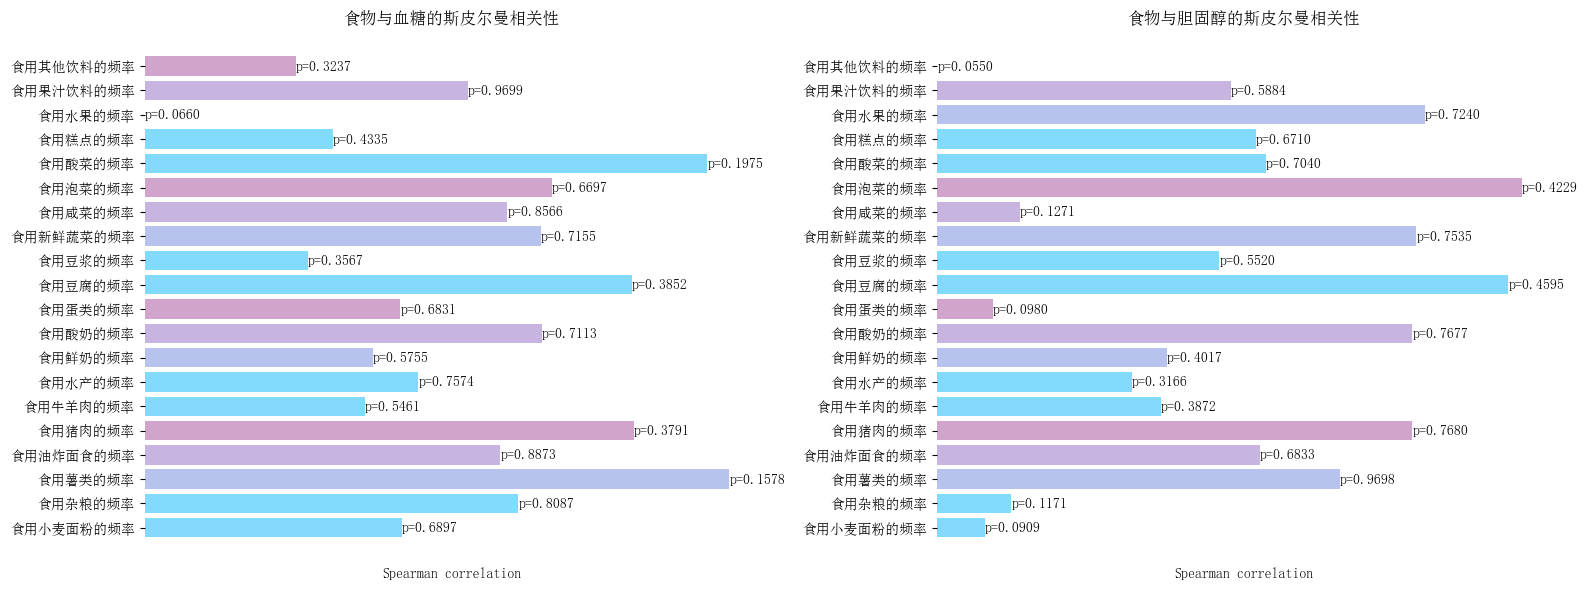

In [57]:
x = ['食用小麦面粉的频率', '食用杂粮的频率', '食用薯类的频率', '食用油炸面食的频率', '食用猪肉的频率',
    '食用牛羊肉的频率', '食用水产的频率', '食用鲜奶的频率', '食用酸奶的频率','食用蛋类的频率',
     '食用豆腐的频率', '食用豆浆的频率', '食用新鲜蔬菜的频率','食用咸菜的频率', '食用泡菜的频率',
     '食用酸菜的频率', '食用糕点的频率', '食用水果的频率', '食用果汁饮料的频率', '食用其他饮料的频率']
y = [ '血糖','胆固醇']  # 修改为需要分析的y变量
spearman(data,x,y)